In [1]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Original shape:", x_train.shape)

# Reshape images (28x28 -> 784)
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

print("Reshaped shape:", x_train.shape)


Original shape: (60000, 28, 28)
Reshaped shape: (60000, 784)


In [3]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),  # Hidden layer
    Dense(64, activation='relu'),                      # Extra hidden layer
    Dense(10, activation='softmax')                    # Output layer
])


In [4]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [5]:
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9244 - loss: 0.2545 - val_accuracy: 0.9622 - val_loss: 0.1333
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9673 - loss: 0.1078 - val_accuracy: 0.9735 - val_loss: 0.0946
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9763 - loss: 0.0753 - val_accuracy: 0.9777 - val_loss: 0.0787
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9825 - loss: 0.0550 - val_accuracy: 0.9780 - val_loss: 0.0743
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9859 - loss: 0.0435 - val_accuracy: 0.9772 - val_loss: 0.0816
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9882 - loss: 0.0356 - val_accuracy: 0.9798 - val_loss: 0.0723
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9904 - loss: 0.0295 - val_accuracy: 0.9810 - val_loss: 0.0770
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9921 - loss: 0.0238 

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9741 - loss: 0.1193
Test Loss: 0.11926093697547913
Test Accuracy: 0.9740999937057495


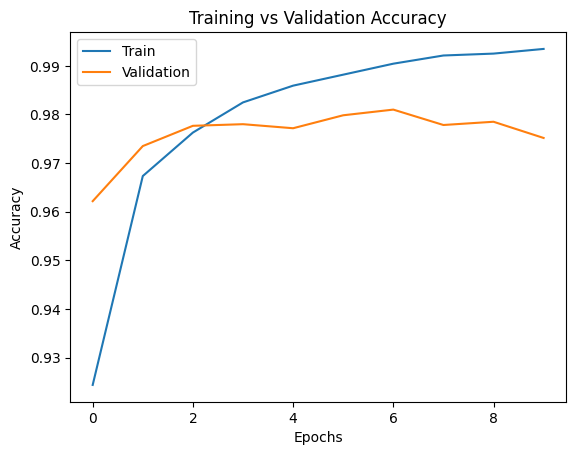

In [7]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

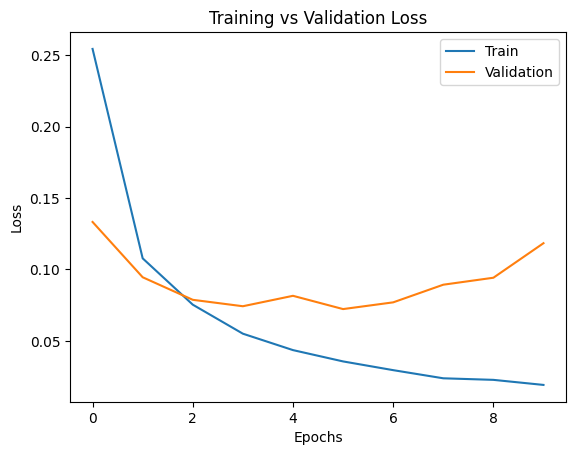

In [8]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()


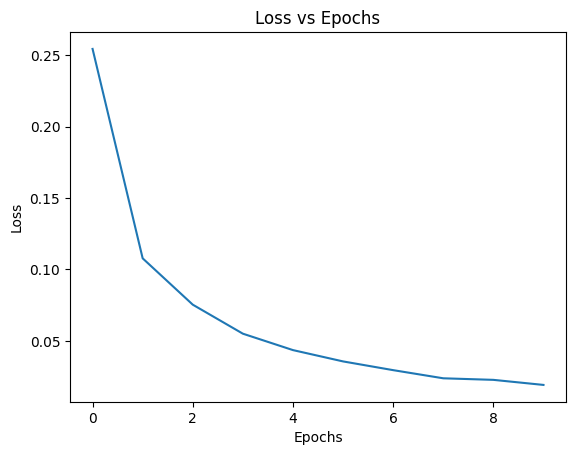

In [9]:
plt.figure()
plt.plot(history.history['loss'])
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
